In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter
bug = pd.read_csv(r"F:\post graduate\dataset\buglist.csv",encoding='latin-1')
assignee = bug['Assignee']
classification = bug['Classification']
product = bug['Product']
component = bug['Component']
list_classification = list(set(bug['Classification']))
list_product = list(set(bug['Product']))
list_component = list(set(bug['Component']))

classification_num = len(set(classification))
product_num = len(set(product))
component_num = len(set(component))
total_num = classification_num+product_num+component_num


In [3]:
# bug.shape[0] → 20000
matrix = np.zeros((20000,total_num),dtype = np.int8)
for i in range(20000):
    cla = bug.iloc[i][3]
    pro = bug.iloc[i][4]
    com = bug.iloc[i][5]
    loc1 = list_classification.index(cla)
    loc2 = list_product.index(pro) + classification_num
    loc3 = list_component.index(com) + classification_num + product_num
    matrix[i][loc1] = 1
    matrix[i][loc2] = 1
    matrix[i][loc3] = 1

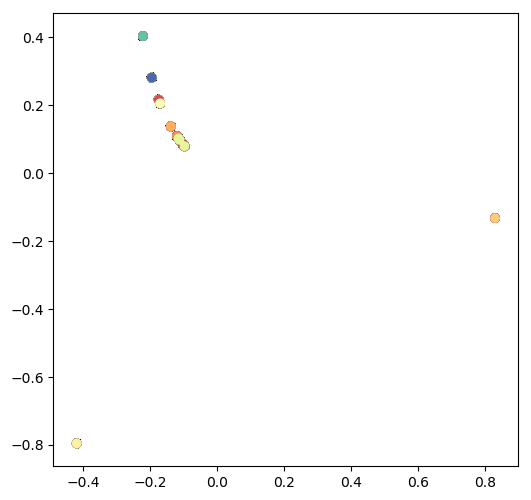

In [4]:
#kpca
color = np.random.rand(len(matrix))
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
kpca_matrix = kpca.fit_transform(matrix)
plt.figure(figsize=(6,6),dpi=100)
plt.scatter(kpca_matrix[:, 0], kpca_matrix[:, 1], c=color, cmap=plt.cm.Spectral)

In [ ]:
# #t-SNE 2D
# tsne = TSNE(n_components=2,init='pca', random_state=0,method='exact')
# tsne_matrix_2d = tsne.fit_transform(matrix)
# print(len(tsne_matrix_2d))
# plt.figure(figsize=(8,8),dpi=80)
# plt.subplot(111)
# plt.scatter(tsne_matrix_2d[:, 0], tsne_matrix_2d[:, 1], c=color, cmap=plt.cm.Spectral)
# plt.show()

In [5]:
dbscan_model = DBSCAN().fit(kpca_matrix)
cnt = Counter(dbscan_model.labels_)

In [53]:
cnt

Counter({0: 13528, 1: 2642, 2: 3830})

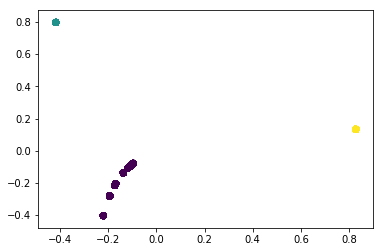

In [54]:
plt.scatter(kpca_matrix[:, 0], kpca_matrix[:, 1], c=dbscan_model.labels_)

In [25]:
dbscan_model.labels_.max()

3

In [26]:
cnt = Counter(dbscan_model.labels_)

In [64]:
cnt

Counter({0: 13528, 1: 2642, 2: 3830})

In [8]:
import csv
summary = bug['Summary']
for i in range(len(dbscan_model.labels_)):
    if dbscan_model.labels_[i] ==0:
        with open(r'F:\post graduate\dataset\data0.csv','a',newline='',encoding='latin-1') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow([classification[i]+' '+product[i]+ ' '+component[i]+' '+summary[i],assignee[i]])